<a href="https://colab.research.google.com/github/osmateoramos/Market-Efficiency-During-the-COVID-19-Pandemic.-Some-Insights-Using-Non-Parametric-Tests/blob/main/Proyecto_no_param%C3%A9trica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis del articulo : Market Efficiency During the COVID-19 Pandemic. Some Insights Using Non-Parametric Tests

## 1. Instalación de librerias:


In [ ]:
install.packages(c("readxl","tidyverse","lubridate","dplyr","tseries", "moments","nortest"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘zoo’, ‘quantmod’




## 2. Tratamiento de datos

Los datos aquí tratados han sido recolectados gracias a la información de la página investing (https://www.investing.com/markets/) para cada uno de los indices. Estos, han sido guardados en DATOS INDICES.xlsx

A continuación se hace el tratamiento de datos para consolidar la información, calcular retornos y luego aplicar los tests no paramétricos propuestos por el artículo.

In [ ]:
library(readxl)
library(tidyverse)
library(lubridate)
library(tseries)

# Leer archivo Excel
DATOS_INDICES <- read_excel("DATOS INDICES.xlsx",
                            col_types = c("text", "date", "numeric",
                                          "numeric", "numeric", "numeric",
                                          "text", "numeric"))

# Pivotar tabla para que cada índice sea columna y fechas filas
tabla_pivotada <- DATOS_INDICES %>%
  select(Indice = Source.Name, Fecha, Valor = Último) %>%
  pivot_wider(names_from = Indice, values_from = Valor) %>%
  arrange(Fecha)

# Rellenar NA con el último valor disponible (last observation carried forward)
tabla_limpiada <- tabla_pivotada %>%
  fill(-Fecha, .direction = "down")

# Calcular retorno simple para cada índice, y poner 0 en el primer día (NA tras lag)
tabla_con_retornos <- tabla_limpiada %>%
  mutate(across(-Fecha, ~ replace_na((. / lag(.)) - 1, 0), .names = "{.col}_retorno"))

# Visualizar tabla final con retornos
View(tabla_con_retornos)



── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



Fecha,BET,BUX,CAC,CROBEX,DAX,FTSE MIB,OMXR,OMXT,OMXV,⋯,DAX_retorno,FTSE MIB_retorno,OMXR_retorno,OMXT_retorno,OMXV_retorno,PX_retorno,SAX_retorno,SBITOP_retorno,SOFIX_retorno,WIG_retorno
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2018-10-01,8441.26,36883.49,5506.82,1781.36,12339.03,20609.99,975.69,1218.55,685.26,⋯,0.0000000000,0.0000000000,0.0000000000,0.000000e+00,0.0000000000,0.0000000000,0.000000000,0.0000000000,0.0000000000,0.000000000
2018-10-02,8511.54,36876.75,5467.89,1782.80,12287.58,20562.31,986.89,1218.54,685.18,⋯,-0.0041696957,-0.0023134412,0.0114790558,-8.206475e-06,-0.0001167440,0.0008286211,-0.001428528,-0.0067301633,0.0000000000,-0.002253845
2018-10-03,8490.84,37212.94,5491.40,1780.89,12287.58,20736.01,979.04,1222.15,680.52,⋯,0.0000000000,0.0084474945,-0.0079542806,2.962562e-03,-0.0068011325,0.0074241211,0.001430572,0.0078771264,0.0000000000,0.006261205
2018-10-04,8512.01,37146.73,5410.85,1774.77,12244.14,20612.93,981.57,1222.04,678.99,⋯,-0.0035352771,-0.0059355681,0.0025841641,-9.000532e-05,-0.0022482807,0.0028809335,0.000000000,-0.0043472580,0.0000000000,-0.007709936
2018-10-05,8554.15,36945.25,5359.36,1766.69,12111.90,20345.96,977.10,1219.01,676.02,⋯,-0.0108002685,-0.0129515794,-0.0045539289,-2.479461e-03,-0.0043741439,-0.0063846840,0.000000000,0.0076946018,0.0000000000,-0.005452185
2018-10-08,8521.11,36768.02,5300.25,1766.69,11947.16,19851.47,981.09,1213.43,674.30,⋯,-0.0136014994,-0.0243040879,0.0040835124,-4.577485e-03,-0.0025443034,-0.0072323225,0.001458922,-0.0071267906,-0.0087719298,-0.015414997
2018-10-09,8545.34,37109.24,5318.55,1775.19,11977.22,20062.25,963.55,1209.72,667.65,⋯,0.0025160791,0.0106178535,-0.0178780744,-3.057449e-03,-0.0098620792,0.0003469052,0.017056663,-0.0025277818,0.0000000000,0.006684301
2018-10-10,8487.88,36821.12,5206.22,1770.15,11712.50,19719.04,962.13,1224.44,666.44,⋯,-0.0221019569,-0.0171072537,-0.0014737170,1.216811e-02,-0.0018123268,0.0012685028,-0.008236102,-0.0074710720,0.0000000000,-0.018473808
2018-10-11,8401.96,35904.54,5106.37,1754.55,11539.35,19356.61,915.62,1203.47,655.57,⋯,-0.0147833511,-0.0183796980,-0.0483406608,-1.712620e-02,-0.0163105456,-0.0122952687,-0.001414172,-0.0138622924,-0.0398230088,-0.015645208


# Exploración de datos:
## Distribución de los retornos

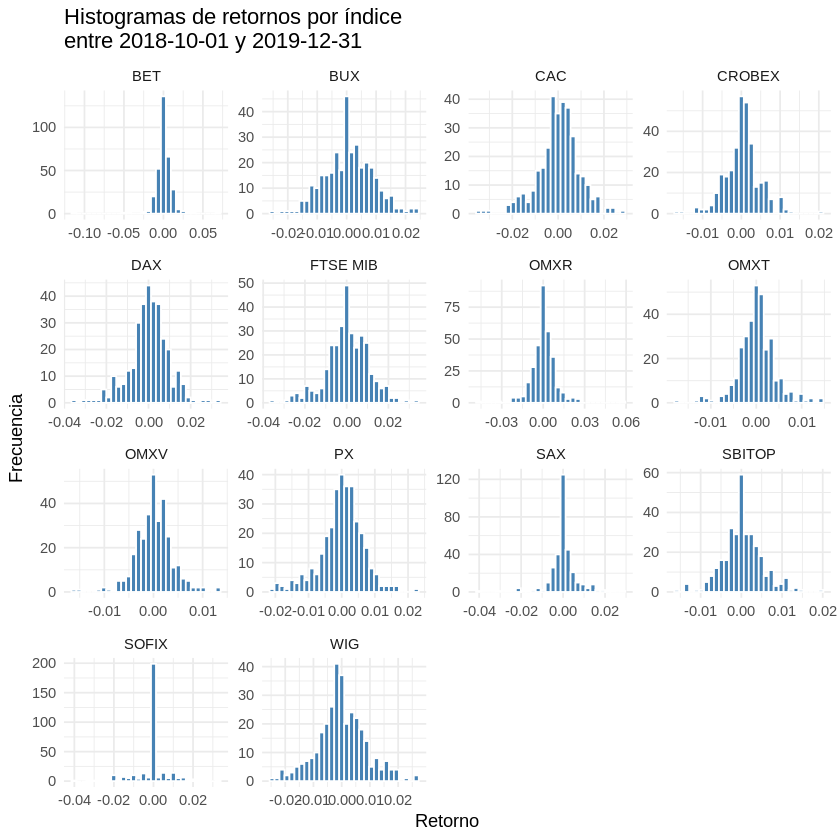

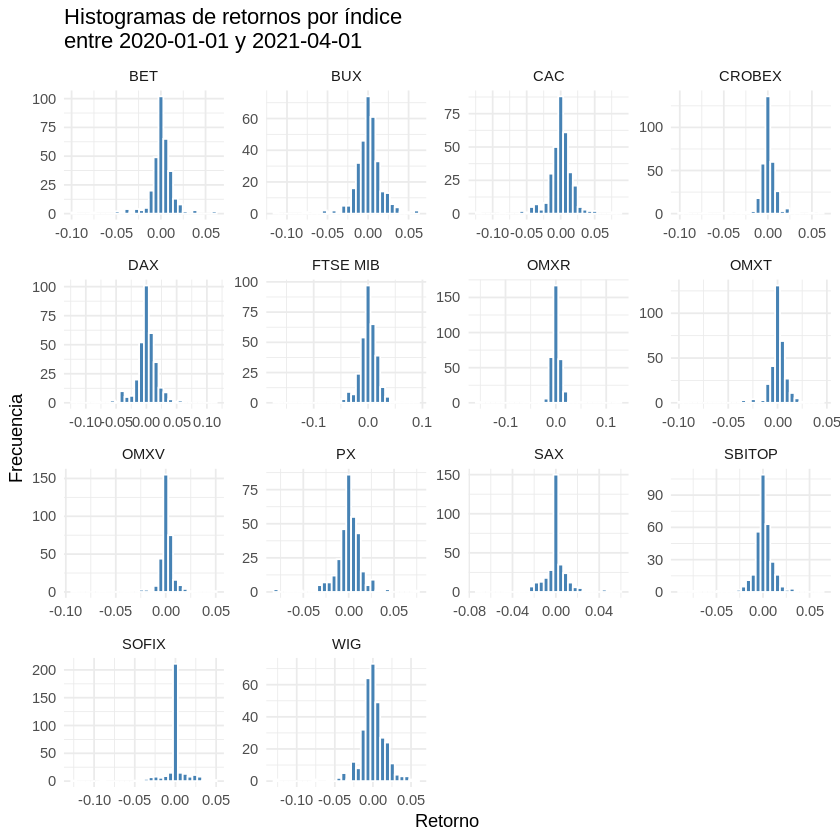

In [ ]:
library(ggplot2)
retornos_largos <- tabla_con_retornos %>%
  select(Fecha, ends_with("_retorno")) %>%
  pivot_longer(-Fecha, names_to = "Indice", values_to = "Retorno") %>%
  mutate(Indice = str_remove(Indice, "_retorno"))

# Definir rango de fechas
fecha_inicio <- as.Date("2018-10-01")
fecha_fin <- as.Date("2019-12-31")

# Filtrar por fechas
retornos_filtrados <- retornos_largos %>%
  filter(Fecha >= fecha_inicio, Fecha <= fecha_fin)

# Crear histogramas
ggplot(retornos_filtrados, aes(x = Retorno)) +
  geom_histogram(bins = 30, fill = "steelblue", color = "white") +
  facet_wrap(~ Indice, scales = "free") +
  theme_minimal() +
  labs(
    title = paste0("Histogramas de retornos por índice\nentre ",
                   format(fecha_inicio, "%Y-%m-%d"), " y ",
                   format(fecha_fin, "%Y-%m-%d")),
    x = "Retorno",
    y = "Frecuencia"
  )


  retornos_largos <- tabla_con_retornos %>%
  select(Fecha, ends_with("_retorno")) %>%
  pivot_longer(-Fecha, names_to = "Indice", values_to = "Retorno") %>%
  mutate(Indice = str_remove(Indice, "_retorno"))

# Definir rango de fechas
fecha_inicio <- as.Date("2020-01-01")
fecha_fin <- as.Date("2021-04-01")

# Filtrar por fechas
retornos_filtrados <- retornos_largos %>%
  filter(Fecha >= fecha_inicio, Fecha <= fecha_fin)

# Crear histogramas
ggplot(retornos_filtrados, aes(x = Retorno)) +
  geom_histogram(bins = 30, fill = "steelblue", color = "white") +
  facet_wrap(~ Indice, scales = "free") +
  theme_minimal() +
  labs(
    title = paste0("Histogramas de retornos por índice\nentre ",
                   format(fecha_inicio, "%Y-%m-%d"), " y ",
                   format(fecha_fin, "%Y-%m-%d")),
    x = "Retorno",
    y = "Frecuencia"
  )

## Diagramas de caja y bigotes

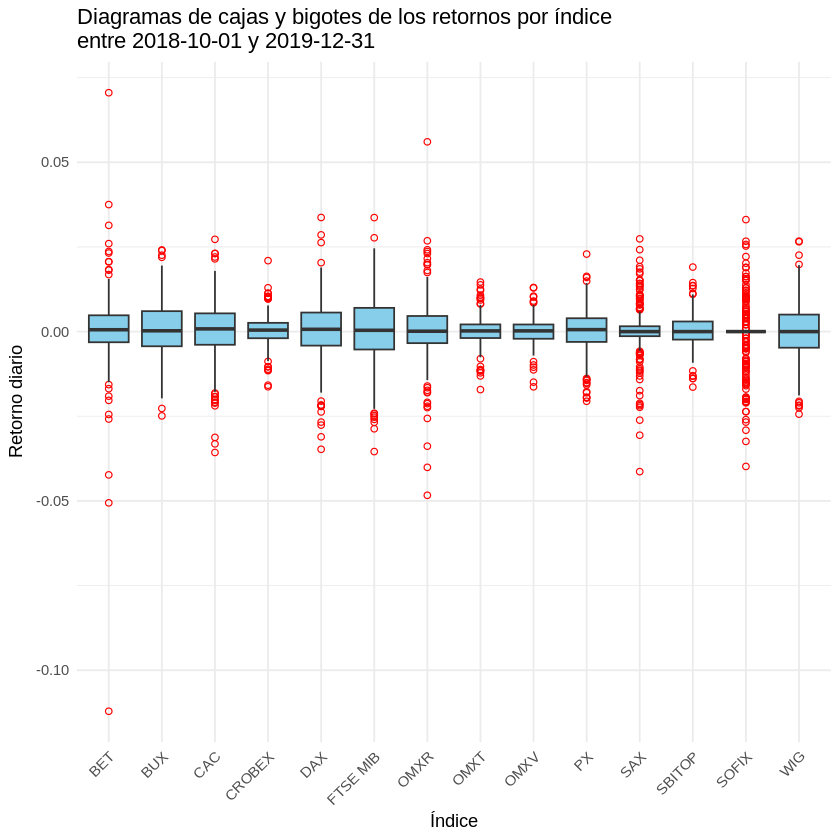

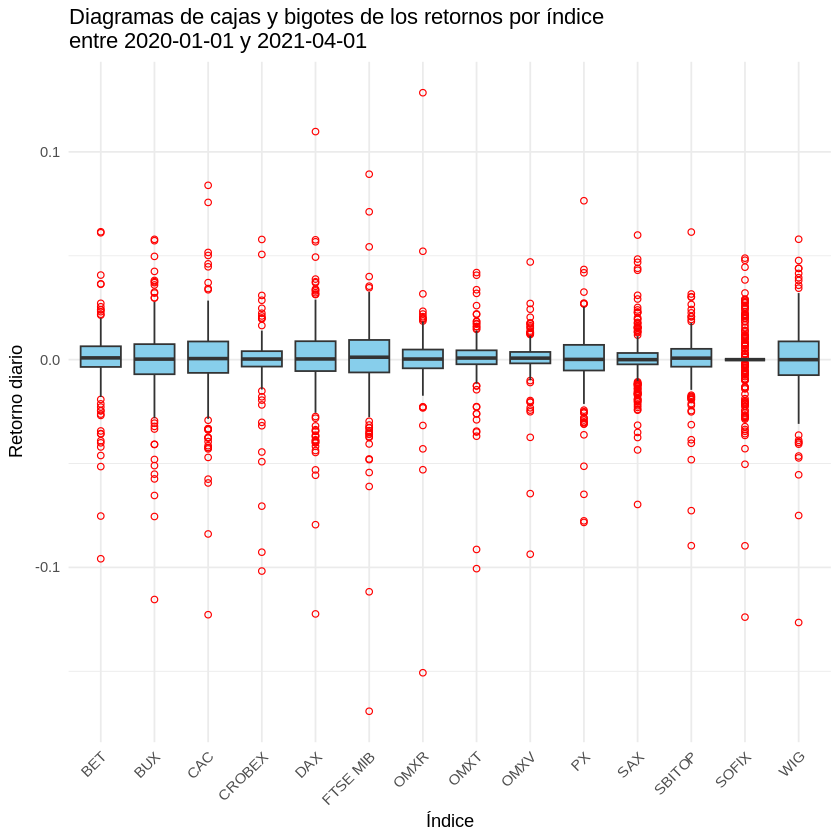

In [ ]:
library(ggplot2)

# Asegurarse de tener los retornos en formato largo
retornos_largos <- tabla_con_retornos %>%
  select(Fecha, ends_with("_retorno")) %>%
  pivot_longer(-Fecha, names_to = "Indice", values_to = "Retorno") %>%
  mutate(Indice = str_remove(Indice, "_retorno"))

# Definir rango de fechas
fecha_inicio <- as.Date("2018-10-01")
fecha_fin <- as.Date("2019-12-31")

# Filtrar por fechas
retornos_filtrados <- retornos_largos %>%
  filter(Fecha >= fecha_inicio, Fecha <= fecha_fin)

# Crear diagrama de cajas por índice
ggplot(retornos_filtrados, aes(x = Indice, y = Retorno)) +
  geom_boxplot(fill = "skyblue", outlier.color = "red", outlier.shape = 1) +
  theme_minimal() +
  labs(
    title = paste0("Diagramas de cajas y bigotes de los retornos por índice\nentre ",
                   format(fecha_inicio, "%Y-%m-%d"), " y ",
                   format(fecha_fin, "%Y-%m-%d")),
    x = "Índice",
    y = "Retorno diario"
  ) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

  retornos_largos <- tabla_con_retornos %>%
  select(Fecha, ends_with("_retorno")) %>%
  pivot_longer(-Fecha, names_to = "Indice", values_to = "Retorno") %>%
  mutate(Indice = str_remove(Indice, "_retorno"))

# Definir rango de fechas
fecha_inicio <- as.Date("2020-01-01")
fecha_fin <- as.Date("2021-04-01")

retornos_filtrados <- retornos_largos %>%
  filter(Fecha >= fecha_inicio, Fecha <= fecha_fin)

ggplot(retornos_filtrados, aes(x = Indice, y = Retorno)) +
  geom_boxplot(fill = "skyblue", outlier.color = "red", outlier.shape = 1) +
  theme_minimal() +
  labs(
    title = paste0("Diagramas de cajas y bigotes de los retornos por índice\nentre ",
                   format(fecha_inicio, "%Y-%m-%d"), " y ",
                   format(fecha_fin, "%Y-%m-%d")),
    x = "Índice",
    y = "Retorno diario"
  ) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


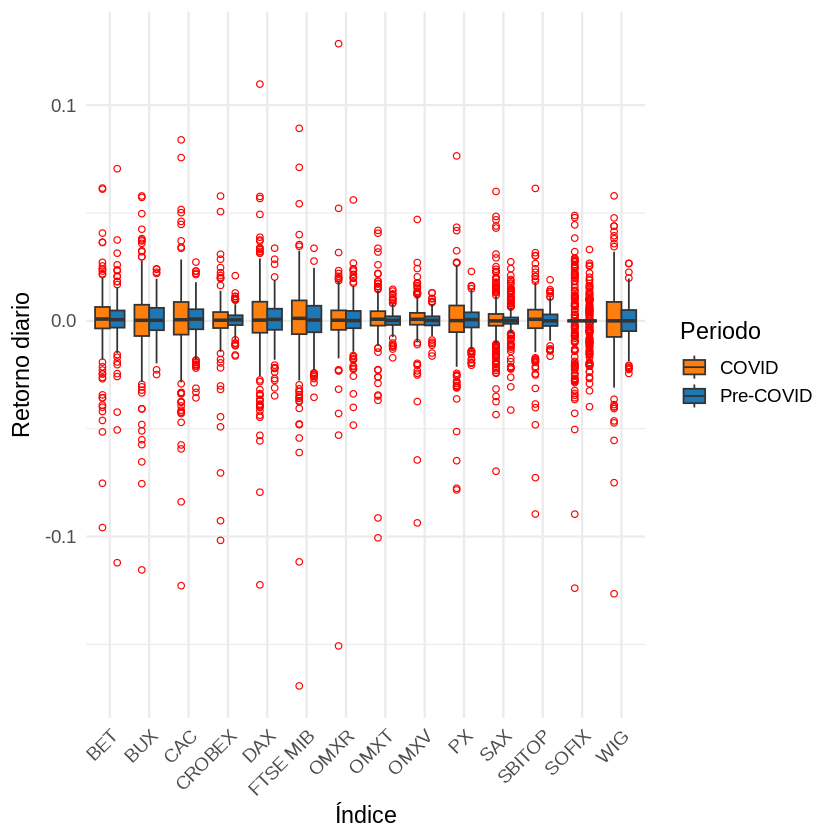

In [ ]:
# Preparar todos los datos en formato largo
retornos_largos <- tabla_con_retornos %>%
  select(Fecha, ends_with("_retorno")) %>%
  pivot_longer(-Fecha, names_to = "Indice", values_to = "Retorno") %>%
  mutate(
    Indice = str_remove(Indice, "_retorno"),
    Periodo = case_when(
      Fecha < as.Date("2020-01-01") ~ "Pre-COVID",
      Fecha >= as.Date("2020-01-01") ~ "COVID"
    )
  )

  ggplot(retornos_largos, aes(x = Indice, y = Retorno, fill = Periodo)) +
  geom_boxplot(outlier.color = "red", outlier.shape = 1, position = position_dodge(width = 0.75)) +
  scale_fill_manual(values = c("Pre-COVID" = "#1f77b4", "COVID" = "#ff7f0e")) +
  theme_minimal(base_size = 14) +
  labs(
    x = "Índice",
    y = "Retorno diario"
  ) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

## QQPlots de los retornos

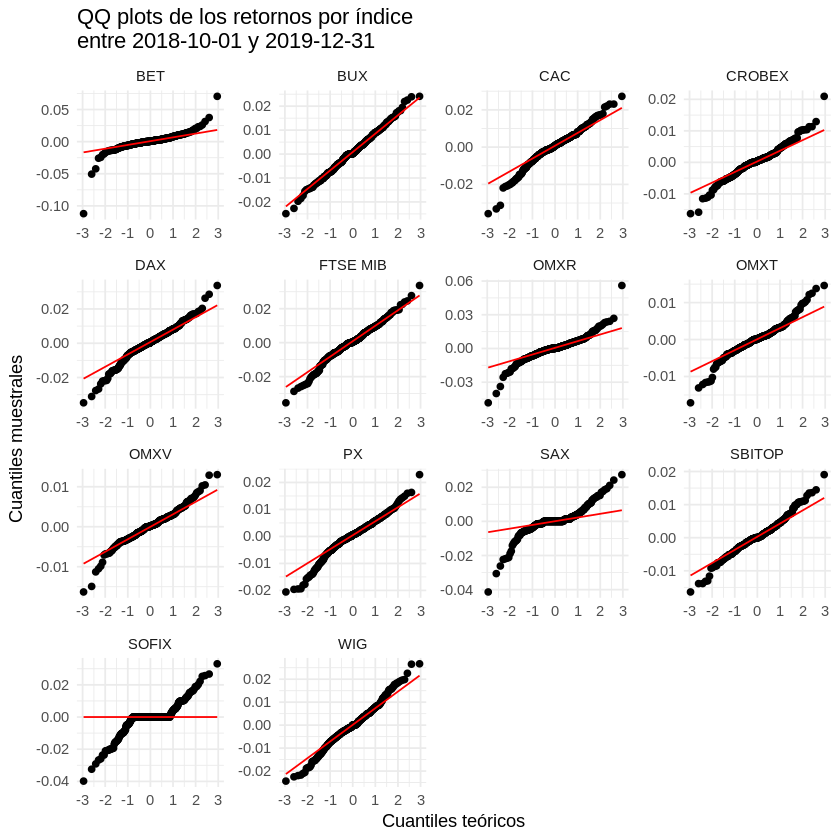

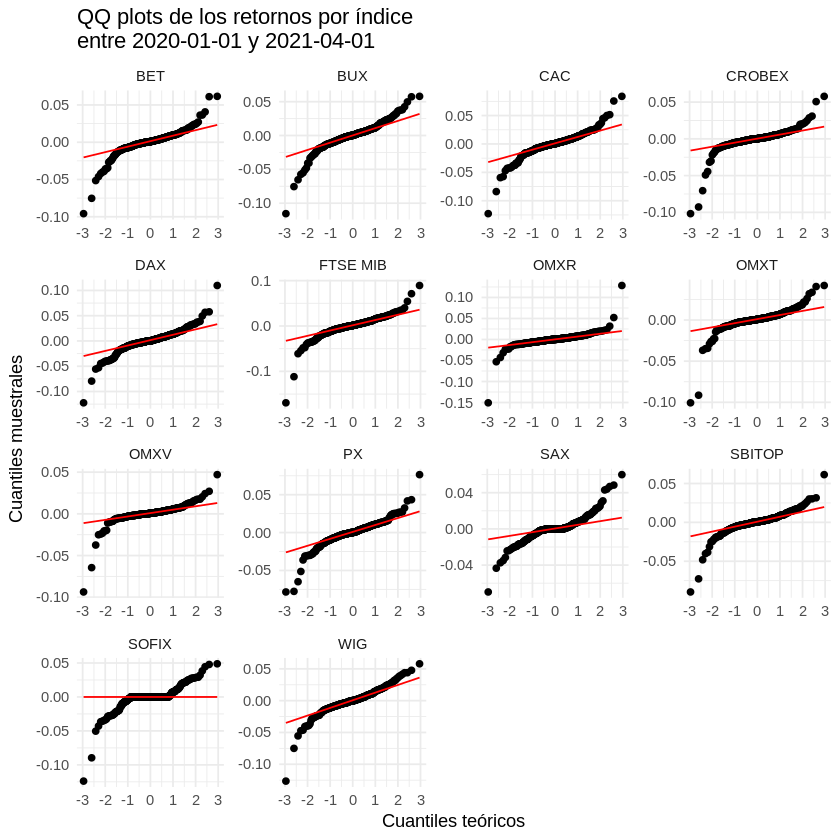

In [ ]:
library(ggplot2)
library(dplyr)
library(tidyr)
library(stringr)

# Convertir datos a formato largo
retornos_largos <- tabla_con_retornos %>%
  select(Fecha, ends_with("_retorno")) %>%
  pivot_longer(-Fecha, names_to = "Indice", values_to = "Retorno") %>%
  mutate(Indice = str_remove(Indice, "_retorno"))

# ----------------------------
# Primer rango: 2018-10-01 a 2019-12-31
# ----------------------------
fecha_inicio_1 <- as.Date("2018-10-01")
fecha_fin_1 <- as.Date("2019-12-31")

retornos_filtrados_1 <- retornos_largos %>%
  filter(Fecha >= fecha_inicio_1, Fecha <= fecha_fin_1)

ggplot(retornos_filtrados_1, aes(sample = Retorno)) +
  stat_qq() +
  stat_qq_line(color = "red") +
  facet_wrap(~ Indice, scales = "free") +
  theme_minimal() +
  labs(
    title = paste0("QQ plots de los retornos por índice\nentre ",
                   format(fecha_inicio_1, "%Y-%m-%d"), " y ",
                   format(fecha_fin_1, "%Y-%m-%d")),
    x = "Cuantiles teóricos",
    y = "Cuantiles muestrales"
  )

# ----------------------------
# Segundo rango: 2020-01-01 a 2021-01-01
# ----------------------------
fecha_inicio_2 <- as.Date("2020-01-01")
fecha_fin_2 <- as.Date("2021-04-01")

retornos_filtrados_2 <- retornos_largos %>%
  filter(Fecha >= fecha_inicio_2, Fecha <= fecha_fin_2)

ggplot(retornos_filtrados_2, aes(sample = Retorno)) +
  stat_qq() +
  stat_qq_line(color = "red") +
  facet_wrap(~ Indice, scales = "free") +
  theme_minimal() +
  labs(
    title = paste0("QQ plots de los retornos por índice\nentre ",
                   format(fecha_inicio_2, "%Y-%m-%d"), " y ",
                   format(fecha_fin_2, "%Y-%m-%d")),
    x = "Cuantiles teóricos",
    y = "Cuantiles muestrales"
  )



Como se aprecia, es necesario aplicar pruebas no paramétricas para series de tiempo ya que, en primera instancia, no hay evidencia por lo menos visual de que existe normalidad en los índices. Se aplicará más adelante prueba de normalidad Jarque-Bera para probar lo ultimamente dicho.

# 4. Aplicación de tests:

## Runs Tests:

- H₀: Los datos son independientes (las observaciones siguen una secuencia aleatoria).
- H₁: Los datos no son independientes (existe patrón o dependencia en la secuencia de signos).

*Se aplica a secuencias binarias (como signos positivos/negativos) para detectar aleatoriedad.*


In [ ]:
#' Realiza el Runs Test manual y genera estadísticas descriptivas para varios índices de retorno
#'
#' @param df DataFrame con los datos
#' @param fecha_col Nombre de la columna de fechas (sin comillas)
#' @param indices Vector con los nombres de columnas de retorno (caracteres)
#' @param fecha_inicio Fecha inicial del intervalo (Date o "YYYY-MM-DD")
#' @param fecha_fin Fecha final del intervalo (Date o "YYYY-MM-DD")
#'
#' @return Tibble con estadísticas y resultados del Runs Test por índice
#' @examples
#' runs_test_manual_indices_intervalo(df = tabla_con_retornos,
#'                                    fecha_col = Fecha,
#'                                    indices = c("BET_retorno", "BUX_retorno"),
#'                                    fecha_inicio = "2019-01-01",
#'                                    fecha_fin = "2020-01-01")

runs_test_manual_indices_intervalo <- function(df, fecha_col, indices, fecha_inicio, fecha_fin) {
  require(dplyr)
  require(moments)
  require(tibble)
  require(stats)
  require(nortest) # Para ad.test()

  # Convertir fechas
  fecha_inicio <- as.Date(fecha_inicio)
  fecha_fin <- as.Date(fecha_fin)

  # Filtrar por fechas
  df_filtrado <- df %>%
    filter({{ fecha_col }} >= fecha_inicio & {{ fecha_col }} <= fecha_fin)

  # Aplicar análisis a cada índice
  resultados <- lapply(indices, function(indice) {
    valores <- df_filtrado[[indice]]
    valores <- valores[!is.na(valores)]

    # Codificar la serie binaria: 0 si <= 0, 1 si > 0
    binaria <- ifelse(valores <= 0, 0, 1)

    # Contar cantidad de runs (secuencias de 0s o 1s)
    R <- sum(diff(binaria) != 0) + 1

    # Parámetros del test
    n1 <- sum(binaria == 1)
    n0 <- sum(binaria == 0)
    n <- n0 + n1

    # Evitar división por cero
    if (n0 == 0 || n1 == 0 || n <= 1) {
      return(tibble(
        Indice = indice,
        `Mean (%)` = NA,
        `Maximum (%)` = NA,
        `Minimum (%)` = NA,
        Skewness = NA,
        `Excess Kurtosis*` = NA,
        `Jarque-Bera p-value` = NA,
        `Runs Test Z` = NA,
        `Runs Test p-value` = NA,
        `Reject H0 (i.i.d)` = NA,
        `Anderson-Darling p-value` = NA
      ))
    }

    mu <- (2 * n0 * n1) / (n0 + n1) + 1
    sigma <- sqrt((2 * n0 * n1 * (2 * n0 * n1 - n0 - n1)) / ((n0 + n1)^2 * (n0 + n1 - 1)))
    z <- (R - mu) / sigma
    p_valor <- 2 * (1 - pnorm(abs(z)))

    jb <- jarque.bera.test(valores)
    da <- ad.test(valores)

    tibble(
      Indice = indice,
      `Mean (%)` = mean(valores) * 100,
      `Maximum (%)` = max(valores) * 100,
      `Minimum (%)` = min(valores) * 100,
      Skewness = skewness(valores),
      `Excess Kurtosis*` = kurtosis(valores) - 3,
      `Jarque-Bera p-value` = jb$p.value,
      `Runs Test Z` = z,
      `Runs Test p-value` = p_valor,
      `Reject H0 (i.i.d)` = ifelse(p_valor < 0.05, "Yes", "No"),
      `Anderson-Darling p-value` = da$p.value
    )
  })

  bind_rows(resultados)
}

Aplicación de Test antes de COVID según articulo:

In [ ]:
runstest_PreCOVID <- runs_test_manual_indices_intervalo(
  df = tabla_con_retornos,
  fecha_col = Fecha,  # Nota: sin comillas
  indices = c("BET_retorno", "BUX_retorno", "CAC_retorno",
             "CROBEX_retorno", "DAX_retorno", "FTSE MIB_retorno",
             "OMXR_retorno", "OMXT_retorno", "OMXV_retorno", "PX_retorno",
             "SAX_retorno", "SBITOP_retorno", "SOFIX_retorno", "WIG_retorno"),
  fecha_inicio = "2018-10-01",
  fecha_fin = "2019-12-31"
)

# Ver resultados
runstest_PreCOVID

Loading required package: moments

Loading required package: nortest



Indice,Mean (%),Maximum (%),Minimum (%),Skewness,Excess Kurtosis*,Jarque-Bera p-value,Runs Test Z,Runs Test p-value,Reject H0 (i.i.d),Anderson-Darling p-value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
BET_retorno,0.058772415,7.054580,-11.212124,-2.52871874,33.9003306,0.000000e+00,0.58718777,0.5570776079,No,3.700000e-24
BUX_retorno,0.072700824,2.410886,-2.489278,0.02198482,0.2111954,7.325564e-01,0.17632335,0.8600399176,No,4.424978e-01
CAC_retorno,0.029570143,2.724282,-3.570188,-0.50684202,1.6108160,3.017453e-11,-1.32644418,0.1846926124,No,4.296529e-06
CROBEX_retorno,0.039774047,2.095037,-1.628337,0.04476507,2.1349188,5.484502e-14,-0.18835483,0.8505985088,No,2.094592e-06
DAX_retorno,0.026449284,3.369890,-3.475461,-0.35886498,1.5309756,4.970662e-09,-0.48939757,0.6245602594,No,2.942966e-06
FTSE MIB_retorno,0.046008705,3.366871,-3.543280,-0.26801276,0.8818194,8.073837e-04,-0.26561321,0.7905371120,No,9.562619e-04
OMXR_retorno,0.022984186,5.604352,-4.834066,-0.08785581,7.5478588,0.000000e+00,3.52370034,0.0004255652,Yes,7.107728e-17
OMXT_retorno,0.016064594,1.463228,-1.712620,-0.10647905,2.6498523,0.000000e+00,-0.25049073,0.8022078733,No,1.078884e-09
OMXV_retorno,0.012667139,1.302822,-1.631055,-0.22635794,2.5654056,0.000000e+00,-2.04971540,0.0403922112,Yes,2.409310e-05


Aplicación de Test luego de COVID según articulo:

In [ ]:
runstest_PostCOVID <- runs_test_manual_indices_intervalo(
  df = tabla_con_retornos,
  fecha_col = Fecha,
  indices = c("BET_retorno", "BUX_retorno","CAC_retorno"
  ,"CROBEX_retorno","DAX_retorno","FTSE MIB_retorno"
  ,"OMXR_retorno","OMXT_retorno","OMXV_retorno","PX_retorno"
  ,"SAX_retorno","SBITOP_retorno","SOFIX_retorno","WIG_retorno"),
  fecha_inicio = "2020-01-01",
  fecha_fin = "2021-04-1"
)

runstest_PostCOVID


Indice,Mean (%),Maximum (%),Minimum (%),Skewness,Excess Kurtosis*,Jarque-Bera p-value,Runs Test Z,Runs Test p-value,Reject H0 (i.i.d),Anderson-Darling p-value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
BET_retorno,0.049497358,6.154611,-9.584392,-1.4233397,11.787955,0,-1.9138189,0.055643300,No,3.700000e-24
BUX_retorno,0.002675920,5.789982,-11.545660,-1.2546260,8.133241,0,-0.2784706,0.780651135,No,1.821049e-18
CAC_retorno,0.023716025,8.389473,-12.276775,-0.9395758,9.070107,0,1.2368674,0.216136323,No,3.524415e-22
CROBEX_retorno,-0.014194525,5.783962,-10.176446,-3.0967959,25.952672,0,0.9621020,0.335998380,No,3.700000e-24
DAX_retorno,0.058491677,10.975901,-12.238616,-0.6197277,9.762803,0,1.6208175,0.105056778,No,8.565576e-23
FTSE MIB_retorno,0.036108950,8.925565,-16.923760,-2.2363377,19.456978,0,0.6519244,0.514449916,No,1.820944e-23
OMXR_retorno,0.035320659,12.847327,-15.070867,-1.4793776,56.765957,0,2.0713693,0.038324295,Yes,3.700000e-24
OMXT_retorno,0.057691994,4.191147,-10.059818,-3.5145722,30.295538,0,-3.0202368,0.002525772,Yes,3.700000e-24
OMXV_retorno,0.059966607,4.700546,-9.365519,-3.9267928,38.939710,0,-0.1808744,0.856466198,No,3.700000e-24


## **Test de Bartels (versión de rangos del test de Von Neumann)**

- H₀: Los datos son independientes e idénticamente distribuidos (i.i.d.).
- H₁: Los datos no son independientes (existe dependencia secuencial).

*Este test detecta autocorrelación sin asumir normalidad, usando los rangos de los datos.*

In [ ]:
#' Realiza el test de Bartels (versión de rangos del test de Von Neumann) para varios índices de retorno
#'
#' @param df DataFrame con los datos
#' @param fecha_col Nombre de la columna de fechas (sin comillas)
#' @param indices Vector con los nombres de columnas de retorno (caracteres)
#' @param fecha_inicio Fecha inicial del intervalo (Date o "YYYY-MM-DD")
#' @param fecha_fin Fecha final del intervalo (Date o "YYYY-MM-DD")
#'
#' @return Tibble con resultados del Bartels Test por índice
#' @examples
#' bartels_test_indices_intervalo(df = tabla_con_retornos,
#'                                 fecha_col = Fecha,
#'                                 indices = c("BET_retorno", "BUX_retorno"),
#'                                 fecha_inicio = "2019-01-01",
#'                                 fecha_fin = "2020-01-01")

bartels_test_indices_intervalo <- function(df, fecha_col, indices, fecha_inicio, fecha_fin) {
  require(dplyr)
  require(tibble)
  require(stats)

  # Convertir fechas
  fecha_inicio <- as.Date(fecha_inicio)
  fecha_fin <- as.Date(fecha_fin)

  # Filtrar por fechas
  df_filtrado <- df %>%
    filter({{ fecha_col }} >= fecha_inicio & {{ fecha_col }} <= fecha_fin)

  resultados <- lapply(indices, function(indice) {
    valores <- df_filtrado[[indice]]
    valores <- valores[!is.na(valores)]

    n <- length(valores)
    if (n <= 2) {
      return(tibble(
        Indice = indice,
        `Bartels Test RVN` = NA,
        `Bartels Test p-value` = NA,
        `Reject H0 (i.i.d)` = NA
      ))
    }

    rangos <- rank(valores)
    difs <- diff(rangos)
    RVN <- sum(difs^2) / sum((rangos - mean(rangos))^2)

    # Varianza exacta del RVN bajo H0
    numerador <- 4 * (n - 2) * (5 * n^2 - 2 * n - 9)
    denominador <- 5 * n * (n + 1) * (n - 1)^2
    sigma_rvn <- sqrt(numerador / denominador)

    # Estadístico Z y p-valor
    z <- (RVN - 2) / sigma_rvn
    p_valor <- 2 * (1 - pnorm(abs(z)))

    tibble(
      Indice = indice,
      `Bartels Test RVN (z)` = z,
      `Bartels Test p-value` = p_valor,
      `Reject H0 (i.i.d)` = ifelse(p_valor < 0.05, "Sí", "No")
    )
  })

  bind_rows(resultados)
}


Aplicación de Test antes de COVID según articulo:

In [ ]:
bartelstest_PreCOVID <- bartels_test_indices_intervalo(
  df = tabla_con_retornos,
  fecha_col = Fecha,
  indices = c("BET_retorno", "BUX_retorno","CAC_retorno"
  ,"CROBEX_retorno","DAX_retorno","FTSE MIB_retorno"
  ,"OMXR_retorno","OMXT_retorno","OMXV_retorno","PX_retorno"
  ,"SAX_retorno","SBITOP_retorno","SOFIX_retorno","WIG_retorno"),
  fecha_inicio = "2018-10-01",
  fecha_fin = "2019-12-31"
)

bartelstest_PreCOVID

Indice,Bartels Test RVN (z),Bartels Test p-value,Reject H0 (i.i.d)
<chr>,<dbl>,<dbl>,<chr>
BET_retorno,-0.4667290,6.406938e-01,No
BUX_retorno,-0.4600111,6.455082e-01,No
CAC_retorno,-0.1578703,8.745590e-01,No
CROBEX_retorno,-0.4183066,6.757230e-01,No
DAX_retorno,0.2619196,7.933834e-01,No
FTSE MIB_retorno,0.3530472,7.240530e-01,No
OMXR_retorno,4.1703159,3.041776e-05,Sí
OMXT_retorno,0.4406131,6.594931e-01,No
OMXV_retorno,-3.2452951,1.173290e-03,Sí


Aplicación de Test después de COVID según articulo:

In [ ]:
bartelstest_PostCOVID <- bartels_test_indices_intervalo(
  df = tabla_con_retornos,
  fecha_col = Fecha,
  indices = c("BET_retorno", "BUX_retorno","CAC_retorno"
  ,"CROBEX_retorno","DAX_retorno","FTSE MIB_retorno"
  ,"OMXR_retorno","OMXT_retorno","OMXV_retorno","PX_retorno"
  ,"SAX_retorno","SBITOP_retorno","SOFIX_retorno","WIG_retorno"),
  fecha_inicio = "2020-01-01",
  fecha_fin = "2021-04-1"
)

bartelstest_PostCOVID

Indice,Bartels Test RVN (z),Bartels Test p-value,Reject H0 (i.i.d)
<chr>,<dbl>,<dbl>,<chr>
BET_retorno,-2.1257346,3.352536e-02,Sí
BUX_retorno,-0.5733420,5.664131e-01,No
CAC_retorno,0.6895265,4.904920e-01,No
CROBEX_retorno,-0.4775114,6.329980e-01,No
DAX_retorno,1.2574072,2.086062e-01,No
FTSE MIB_retorno,0.8446267,3.983193e-01,No
OMXR_retorno,4.0749585,4.602255e-05,Sí
OMXT_retorno,-3.5592735,3.718821e-04,Sí
OMXV_retorno,-1.7171630,8.594939e-02,No


# Test Wright en sus formulaciones R1, R2 y S1
## Hipótesis

- **Hipótesis nula \(H_0\)**:

> La serie temporal sigue un paseo aleatorio. Es decir, los incrementos son independientes e idénticamente distribuidos (IID) con media cero y varianza constante.

- **Hipótesis alternativa \(H_1\)**:

> La serie NO sigue un paseo aleatorio. Puede existir dependencia serial o heterocedasticidad (varianza no constante) en los incrementos.

---

## Estadísticos del test:

- $R_{1}$: basado en los **rangos** de los incrementos, detecta dependencias en la estructura de la serie.

- $R_{2}$: basado en la combinación de **rangos y signos**, sensible a ciertas formas de dependencia que los tests clásicos no capturan.

- $S_{1}$: basado en los **signos** de los incrementos, útil para detectar asimetrías o dependencia en la dirección de los cambios.

---


In [ ]:
#' Realiza los tests de Wright (R1, R2 y S1) para varios índices de retorno
#'
#' @param df DataFrame con los datos
#' @param fecha_col Nombre de la columna de fechas (sin comillas)
#' @param indices Vector con los nombres de columnas de retorno (caracteres)
#' @param fecha_inicio Fecha inicial del intervalo (Date o "YYYY-MM-DD")
#' @param fecha_fin Fecha final del intervalo (Date o "YYYY-MM-DD")
#' @param k Número de rezagos para calcular autocorrelación (default = 5)
#'
#' @return Tibble con resultados de los tres tests de Wright por índice
#' @examples
#' wright_tests_indices_intervalo(df = tabla_con_retornos,
#'                              fecha_col = Fecha,
#'                              indices = c("BET_retorno", "BUX_retorno"),
#'                              fecha_inicio = "2019-01-01",
#'                              fecha_fin = "2020-01-01",
#'                              k = 5)
wright_tests_indices_intervalo <- function(df, fecha_col, indices, fecha_inicio, fecha_fin, k = 5) {
  require(dplyr)
  require(tibble)
  require(stats)

  # Convertir fechas a formato Date
  fecha_inicio <- as.Date(fecha_inicio)
  fecha_fin <- as.Date(fecha_fin)

  # Filtrar datos por intervalo de fechas
  df_filtrado <- df %>%
    filter({{ fecha_col }} >= fecha_inicio & {{ fecha_col }} <= fecha_fin)

  # Función para calcular el estadístico R1 de Wright
  calcular_R1 <- function(valores, k, T) {
    rangos <- rank(valores)
    r1t <- (rangos - 0.5*(T + 1)) / sqrt((T - 1)*(T + 1)/12)

    sum_sq_k_lags <- function(r, k, T) {
      sum_k <- 0
      for(t in k:T) {
        sum_k <- sum_k + sum(r[(t-k+1):t])^2
      }
      return(sum_k)
    }

    numerador <- sum_sq_k_lags(r1t, k, T) / (T * k)
    denominador <- sum(r1t^2) / T

    R1 <- (numerador / denominador - 1) * sqrt(3 * k * T / (2 * (2 * k - 1) * (k - 1)))
    return(R1)
  }

  # Función para calcular el estadístico R2 de Wright
  calcular_R2 <- function(valores, k, T) {
    rangos <- rank(valores)
    r2t <- qnorm(rangos / (T + 1))

    sum_sq_k_lags <- function(r, k, T) {
      sum_k <- 0
      for(t in k:T) {
        sum_k <- sum_k + sum(r[(t-k+1):t])^2
      }
      return(sum_k)
    }

    numerador <- sum_sq_k_lags(r2t, k, T) / (T * k)
    denominador <- sum(r2t^2) / T

    R2 <- (numerador / denominador - 1) * sqrt(3 * k * T / (2 * (2 * k - 1) * (k - 1)))
    return(R2)
  }

  # Función para calcular el estadístico S1 de Wright
  calcular_S1 <- function(valores, k, T) {
    mediana <- median(valores)
    st <- sign(valores - mediana)

    sum_sq_k_lags <- function(s, k, T) {
      sum_k <- 0
      for(t in k:T) {
        sum_k <- sum_k + sum(s[(t-k+1):t])^2
      }
      return(sum_k)
    }

    numerador <- sum_sq_k_lags(st, k, T) / (T * k)
    denominador <- sum(st^2) / T

    S1 <- (numerador / denominador - 1) * sqrt(3 * k * T / (2 * (2 * k - 1) * (k - 1)))
    return(S1)
  }

  # Aplicar tests a cada índice
  resultados <- lapply(indices, function(indice) {
    valores <- df_filtrado[[indice]]
    valores <- valores[!is.na(valores)]
    T <- length(valores)

    if(T <= k + 1) {
      return(tibble(
        Indice = indice,
        `Wright R1` = NA,
        `Wright R2` = NA,
        `Wright S1` = NA,
        `Valor crítico 5%` = NA,
        `Reject H0 (i.i.d)` = NA,
        Observaciones = T)
      )
    }

    # Calcular los tres estadísticos
    R1 <- calcular_R1(valores, k, T)
    R2 <- calcular_R2(valores, k, T)
    S1 <- calcular_S1(valores, k, T)

    # Valores críticos aproximados (consultar Wright 2000 para valores exactos)
    valor_critico <- 1.96  # Para k=5, nivel 5% (aproximado)

    # Determinar si se rechaza H0 para cada test
    rechazo_R1 <- ifelse(abs(R1) > valor_critico, "Sí", "No")
    rechazo_R2 <- ifelse(abs(R2) > valor_critico, "Sí", "No")
    rechazo_S1 <- ifelse(abs(S1) > valor_critico, "Sí", "No")

    tibble(
      Indice = indice,
      `Wright R1` = R1,
      `Wright R2` = R2,
      `Wright S1` = S1,
      `Valor crítico 5%` = valor_critico,
      `Reject H0 R1` = rechazo_R1,
      `Reject H0 R2` = rechazo_R2,
      `Reject H0 S1` = rechazo_S1,
      Observaciones = T)
  })

  bind_rows(resultados)
}

Aplicación de Test antes de COVID según articulo (k=5):

In [ ]:
Wrighttest_PreCOVID <- wright_tests_indices_intervalo(
  df = tabla_con_retornos,
  fecha_col = Fecha,
  indices = c("BET_retorno", "BUX_retorno","CAC_retorno"
  ,"CROBEX_retorno","DAX_retorno","FTSE MIB_retorno"
  ,"OMXR_retorno","OMXT_retorno","OMXV_retorno","PX_retorno"
  ,"SAX_retorno","SBITOP_retorno","SOFIX_retorno","WIG_retorno"),
  fecha_inicio = "2018-10-01",
  fecha_fin = "2019-12-31"
)

Wrighttest_PreCOVID

Indice,Wright R1,Wright R2,Wright S1,Valor crítico 5%,Reject H0 R1,Reject H0 R2,Reject H0 S1,Observaciones
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>
BET_retorno,-0.59180049,-0.23460048,-1.53332130,1.96,No,No,No,321
BUX_retorno,-0.90158992,-0.85028826,-1.14487991,1.96,No,No,No,321
CAC_retorno,-0.63527630,-0.46937663,-0.06133285,1.96,No,No,No,321
CROBEX_retorno,0.07774828,0.32138258,0.51110710,1.96,No,No,No,321
DAX_retorno,-0.86423849,-0.79227016,-0.26577569,1.96,No,No,No,321
FTSE MIB_retorno,-0.82201157,-0.72474615,-0.42932996,1.96,No,No,No,321
OMXR_retorno,-3.91848332,-4.09111838,-3.25064116,1.96,Sí,Sí,Sí,321
OMXT_retorno,0.32379320,0.01587434,1.22665704,1.96,No,No,No,321
OMXV_retorno,3.91389573,3.97791129,2.78042263,1.96,Sí,Sí,Sí,321


Aplicación de Test después de COVID según articulo (k=5):



In [ ]:
Wrighttest_PostCOVID <- wright_tests_indices_intervalo(
  df = tabla_con_retornos,
  fecha_col = Fecha,
  indices = c("BET_retorno", "BUX_retorno","CAC_retorno"
  ,"CROBEX_retorno","DAX_retorno","FTSE MIB_retorno"
  ,"OMXR_retorno","OMXT_retorno","OMXV_retorno","PX_retorno"
  ,"SAX_retorno","SBITOP_retorno","SOFIX_retorno","WIG_retorno"),
  fecha_inicio = "2020-01-01",
  fecha_fin = "2021-04-1"
)

Wrighttest_PostCOVID

Indice,Wright R1,Wright R2,Wright S1,Valor crítico 5%,Reject H0 R1,Reject H0 R2,Reject H0 S1,Observaciones
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>
BET_retorno,2.0183889,1.8132378,1.9004813,1.96,Sí,No,No,323
BUX_retorno,0.8401555,0.7158279,0.7540784,1.96,No,No,No,323
CAC_retorno,-0.3814508,0.2437350,-1.8546252,1.96,No,No,No,323
CROBEX_retorno,0.4596362,0.9370344,-0.4076099,1.96,No,No,No,323
DAX_retorno,-1.1380986,-0.3316153,-1.3247323,1.96,No,No,No,323
FTSE MIB_retorno,0.1065143,0.6759264,-1.3451128,1.96,No,No,No,323
OMXR_retorno,-3.0482919,-2.6978755,-2.0380496,1.96,Sí,Sí,Sí,323
OMXT_retorno,2.7603434,2.8633705,2.9347915,1.96,Sí,Sí,Sí,323
OMXV_retorno,2.3683644,2.9371121,0.6317954,1.96,Sí,Sí,No,323
